In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats

In [2]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [3]:
# Merging clients and dispositions
clients = pd.read_csv("dataset/client.csv", sep=";")

disps = pd.read_csv("dataset/disp.csv", sep=";")

clients_disps = pd.merge(clients, disps, on="client_id")
#plt.title('Distribution of client\'s type', fontdict={'fontsize': 14, 'fontweight': 'bold'})
#plt.hist(clients_disps['type'])
#plt.savefig("stats/client_type_hist.png")

In [4]:
# Merging clients/dispositions and cards
cards = pd.read_csv("dataset/card_train.csv", sep=";")
#plt.title("Distribution of card's type", fontdict={'fontsize': 14, 'fontweight': 'bold'})
#plt.hist(cards['type'])
#plt.savefig("stats/card_type_hist.png")

clients_disps.rename(columns={"type": "type_disp"}, inplace=True)

cards.rename(columns={"type": "type_card"}, inplace=True)

clients_disps_cards = pd.merge(clients_disps, cards, on="disp_id", how="outer")

In [5]:
def isDistNormal(col_name, test):

    #print(test["unemploymant rate '95 "])

    x, y = ecdf(test[col_name])

    plt.figure(figsize=(10,7))
    sb.set()
    plt.plot(x, y, marker=".", linestyle="none")
    plt.xlabel("Body Temperature (F)")
    plt.ylabel("Cumulative Distribution Function")

    samples = np.random.normal(np.mean(test[col_name]), np.std(test[col_name]), size=10000)

    x_theor, y_theor = ecdf(samples)

    plt.plot(x_theor, y_theor)
    plt.legend(('Empirical Data','Normal Distribution'), loc='lower right')

    #periscope.output(plt)

    print(stats.normaltest(test[col_name]))

<ipython-input-6-5d6f69d945ce>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["unemploymant rate '95 "] = [float(x) for x in test["unemploymant rate '95 "]]
<ipython-input-6-5d6f69d945ce>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_2["no. of commited crimes '95 "] = [float(x) for x in test["no. of commited crimes '95 "]]


['85677' '2159' '2824' '5244' '2616' '2640' '4289' '5179' '2987' '3810'
 '3475' '3804' '1597' '6604' '1845' '1874' '1003' '1740' '999' '1563'
 '2299' '1089' '2879' '5198' '1822' '6041' '1029' '1580' '818' '2985'
 '1328' '4340' '4650' '5323' '3384' '5796' '4147' '2653' '4947' '6949'
 '6445' '1658' '4085' '2166' '2080' '2854' '6079' '1655' '1660' '2123'
 '3496' '2564' '1850' '18721' '3659' '2854' '3729' '2212' '2595' '1879'
 '2112' '2719' '1562' '4484' '2157' '2247' '3244' '5623' '?' '9878' '4980'
 '9672' '4355' '18782' '4063' '3736' '3460']
NormaltestResult(statistic=151.73946073448786, pvalue=1.1225217328490408e-33)


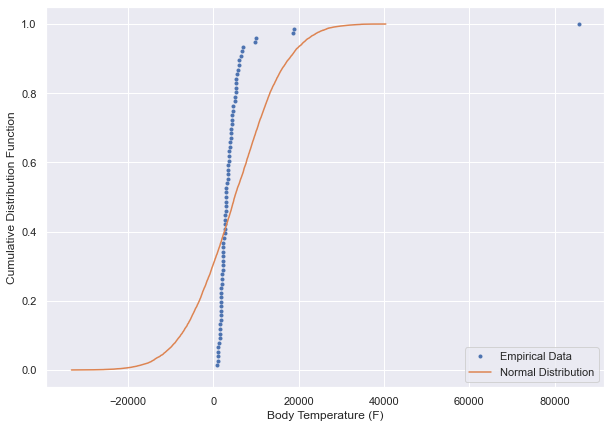

In [6]:
# Cleaning district data
districts = pd.read_csv("dataset/district.csv", sep=";")
# Renaming code to district_id
districts.rename(columns={"code ": "district_id"}, inplace=True)
# Removing name and region
districts.drop(['name ','region'], axis=1, inplace=True)

#district_g = sb.PairGrid(districts)
#district_g.map(plt.scatter)
#plt.savefig("stats/pair_plot_district_data.png")

#plt.figure(figsize=(40,6))
#plt.title("Distribution of district's unemploymant rate in '95", fontdict={'fontsize': 14, 'fontweight': 'bold'})
#plt.hist(districts["unemploymant rate '95 "])
#plt.savefig("stats/district_unemployment_rate_95_hist.png")

test = districts.loc[districts["unemploymant rate '95 "] != '?']
test["unemploymant rate '95 "] = [float(x) for x in test["unemploymant rate '95 "]]

mean_rate = test["unemploymant rate '95 "].mean()


districts["unemploymant rate '95 "] = [mean_rate if x == "?" else float(x) for x in districts["unemploymant rate '95 "]]

print(districts["no. of commited crimes '95 "].values)


test_2 = districts.loc[districts["no. of commited crimes '95 "] != '?']
test_2["no. of commited crimes '95 "] = [float(x) for x in test["no. of commited crimes '95 "]]
isDistNormal("no. of commited crimes '95 ", test_2)


In [7]:
# Merging districts
clients_disps_cards_districts = pd.merge(clients_disps_cards, districts, on="district_id")

clients_disps_cards_districts.drop(['district_id'], inplace=True, axis=1)


In [8]:
# Merging accounts
accounts = pd.read_csv("dataset/account.csv", sep=";")

clients_disps_cards_districts_accounts = pd.merge(clients_disps_cards_districts, accounts, on="account_id")

#plt.title("Distribution of account's frequency", fontdict={'fontsize': 14, 'fontweight': 'bold'})
#plt.hist(accounts["frequency"])
#plt.savefig("stats/account_frequency_hist.png")

In [9]:
# Normalizing dates and adding sex

dates = clients_disps_cards_districts_accounts["birth_number"]
dates = [str(date)[:2] + "-" + str(date)[2:4] + "-" + str(date)[4:] for date in dates]

new_dates = []
sex = []
for date in dates:
    month = int(date[3:5])
    gender = ""
    if month > 12:
        month = month - 50
        gender = "female"
    else:
        gender = "male"
    if month < 10:
        month = "0" + str(month)
    else:
        month = str(month)
    new_dates.append(date[0:2] + "-" + month + "-" + date[6:8])
    sex.append(gender)
    
ages = []
for date in new_dates:
    year = int("19" + date[0:2])
    age = 2021 - year
    ages.append(age)
    
#date_sex = {"age": ages, "sex": sex}
#date_sex_df = pd.DataFrame(date_sex)

clients_disps_cards_districts_accounts = clients_disps_cards_districts_accounts.drop(["birth_number"], axis=1)

people_account_data = clients_disps_cards_districts_accounts.assign(sex = sex, age = ages)


In [10]:
# Merging the rest?

transaction = pd.read_csv("dataset/trans_train.csv", sep=";")

account_loan_trans = pd.merge(people_account_data, transaction, on="account_id")

loan = pd.read_csv("dataset/loan_train.csv", sep=";")

account_loan_data = pd.merge(account_loan_trans, loan, on="account_id", how="outer")

transaction["type"] = [i if i != "withdrawal in cash" else "withdrawal" for i in transaction["type"]]
transaction["k_symbol"] = ["" if type(i) != str or i == " " else i for i in transaction["k_symbol"]]
transaction["operation"] = ["" if type(i) == float else i for i in transaction["operation"]]

#print("     OPERATION")
#print(transaction["operation"].value_counts())
#print(transaction["operation"].isnull().sum())
#print("     K_SYMBOL")
#print(transaction["k_symbol"].value_counts())

#plt.title("Distribution of transaction's type", fontdict={'fontsize': 14, 'fontweight': 'bold'})
#plt.hist(transaction["type"])
#plt.savefig("stats/transaction_type_hist.png")

#plt.figure(figsize=(20,6))
#plt.title("Distribution of transaction's operation", fontdict={'fontsize': 14, 'fontweight': 'bold'})
#plt.hist(transaction["operation"])
#plt.savefig("stats/transaction_operation_hist.png")

#plt.figure(figsize=(20,6))
#plt.title("Distribution of transaction's k_symbol", fontdict={'fontsize': 14, 'fontweight': 'bold'})
#plt.hist(transaction["k_symbol"])
#plt.savefig("stats/transaction_k_symbol_hist.png")

#plt.figure(figsize=(20,6))
#plt.title("Distribution of transaction's balance", fontdict={'fontsize': 14, 'fontweight': 'bold'})
#plt.hist(transaction["balance"])
#plt.savefig("stats/transaction_balance_hist.png")

#plt.figure(figsize=(10,6))
#plt.title("Distribution of transaction's amount", fontdict={'fontsize': 14, 'fontweight': 'bold'})
#plt.hist(transaction["amount"])
#plt.savefig("stats/transaction_amount_hist.png")

#plt.figure(figsize=(10,6))
#plt.title("Distribution of loan's payments", fontdict={'fontsize': 14, 'fontweight': 'bold'})
#plt.hist(loan["payments"])
#plt.savefig("stats/loan_payments_hist.png")

#plt.figure(figsize=(10,6))
#plt.title("Distribution of loan's duration", fontdict={'fontsize': 14, 'fontweight': 'bold'})
#plt.hist(loan["duration"])
#plt.savefig("stats/loan_duration_hist.png")

#plt.figure(figsize=(10,6))
#plt.title("Distribution of loan's amount", fontdict={'fontsize': 14, 'fontweight': 'bold'})
#plt.hist(loan["amount"])
#plt.savefig("stats/loan_amount_hist.png")


/home/mechjm/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [11]:
# Dropping ids
no_ids = account_loan_data.drop(["client_id", "district_id", "trans_id", "disp_id", "card_id", "account_id", "loan_id"], axis=1)

2 Dropped columns: ["unemploymant rate '96 ", "no. of commited crimes '96 "]


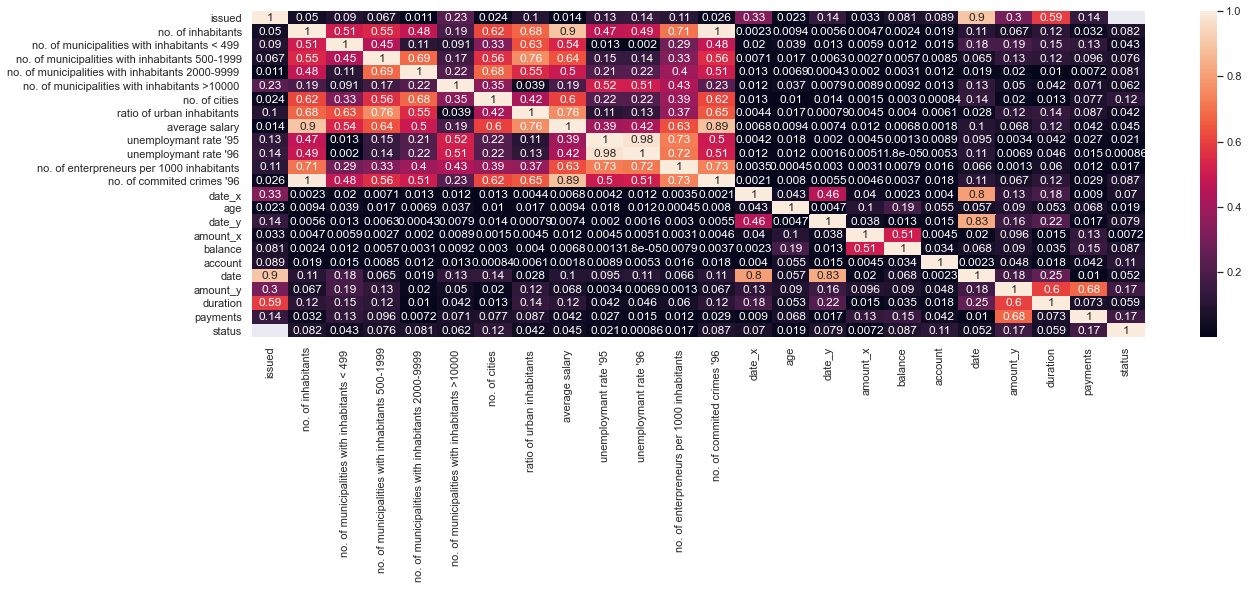

In [12]:
# Removing related columns
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

# Create correlation matrix
corr_matrix = no_ids.corr().abs()
plt.figure(figsize = (20,6))
sb.heatmap(corr_matrix,annot=True)

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
no_ids.drop(to_drop, axis=1, inplace=True)

print("{} Dropped columns: {}".format(len(to_drop), to_drop) )


In [13]:
# Removing rows with nan values for status
no_ids.dropna(subset=["status"], inplace=True)

#print(no_ids.drop_duplicates(inplace=True)
print(no_ids["status"].value_counts())

 1.0    27403
-1.0     2970
Name: status, dtype: int64


In [14]:
# Removing labels and creating another dataset for them
all_inputs = no_ids.iloc[:, :-1].values
all_labels = no_ids.iloc[:, -1].values

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
print(no_ids)
for i in no_ids.columns:
    if no_ids[i].dtype == object:
        no_ids = pd.get_dummies(no_ids, columns = [i])

print(no_ids)



       type_disp type_card  issued  no. of inhabitants  \
4764       OWNER       NaN     NaN               70699   
4765       OWNER       NaN     NaN               70699   
4766       OWNER       NaN     NaN               70699   
4767       OWNER       NaN     NaN               70699   
4768       OWNER       NaN     NaN               70699   
...          ...       ...     ...                 ...   
474633     OWNER       NaN     NaN               81344   
474634     OWNER       NaN     NaN               81344   
474635     OWNER       NaN     NaN               81344   
474636     OWNER       NaN     NaN               81344   
474637     OWNER       NaN     NaN               81344   

        no. of municipalities with inhabitants < 499   \
4764                                               60   
4765                                               60   
4766                                               60   
4767                                               60   
4768              

In [19]:
for i in no_ids.columns:
    print(i)

issued
no. of inhabitants
no. of municipalities with inhabitants < 499 
no. of municipalities with inhabitants 500-1999
no. of municipalities with inhabitants 2000-9999 
no. of municipalities with inhabitants >10000 
no. of cities 
ratio of urban inhabitants 
average salary 
unemploymant rate '95 
no. of enterpreneurs per 1000 inhabitants 
date_x
age
date_y
amount_x
balance
account
date
amount_y
duration
payments
status
type_disp_DISPONENT
type_disp_OWNER
type_card_classic
type_card_gold
type_card_junior
no. of commited crimes '95 _1003
no. of commited crimes '95 _1029
no. of commited crimes '95 _1328
no. of commited crimes '95 _1562
no. of commited crimes '95 _1563
no. of commited crimes '95 _1580
no. of commited crimes '95 _1597
no. of commited crimes '95 _1655
no. of commited crimes '95 _1658
no. of commited crimes '95 _1660
no. of commited crimes '95 _1740
no. of commited crimes '95 _1845
no. of commited crimes '95 _1850
no. of commited crimes '95 _18721
no. of commited crimes '95 

In [17]:
dt_classifier = DecisionTreeClassifier(random_state=0)
dt_grid_search = GridSearchCV(dt_classifier, scoring="roc_auc", cv=10, param_grid={})
dt_grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(dt_grid_search.best_score_))

/home/mechjm/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/mechjm/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/mechjm/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 903, in fit
    super().fit(
  File "/home/mechjm/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 157, in fit
    X, y = self._validate_data(X, y,
  File "/home/mechjm/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 430, in _validate_data
    X = check_array(X, **check_X_params)
  File "/home/mechjm/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/home/mec

ValueError: could not convert string to float: 'OWNER'